In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [3]:
import pandas as pd
import pyproj

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
from pathlib import Path

In [6]:
import joblib

In [7]:
from mt_function_yl import *

In [8]:
import seaborn as sn

### Data loading

In [9]:
# Curb extraction data
predc_a = pd.read_csv('/home/yelhe/script/mt/output/predcurb_accident_count_sum.csv')

In [11]:
# Entropy
# iema = pd.read_csv('/home/yelhe/script/mt/output/accident_image_entropy_mean.csv')
# mewa = pd.read_csv('/home/yelhe/script/mt/output/accident_mask_entropy_wholescene_mean.csv')
# mega = pd.read_csv('/home/yelhe/script/mt/output/accident_mask_entropy_groundscene_mean.csv')

dfen_a = pd.read_csv('/home/yelhe/script/mt/output/accident_entropy_sum.csv')

In [13]:
dfenm = dfen_a.groupby('id', as_index = True)[['mew','meg','ie']].mean()


In [14]:
dfenm = dfenm.reset_index()

In [15]:
dfc = pd.merge(dfenm, predc_a, on = ['id'])

In [16]:
dfc.rename(columns = {'sum':'cn'}, inplace = True)

In [17]:
dfc

,id,mew,meg,ie,cn
0,99900044963840,0.974222,0.707870,4.610898,0.0
1,99900045510756,1.202524,1.230196,4.675890,0.0
2,99900045511204,1.302862,1.501371,4.245212,2.0
3,99900045729553,1.060837,0.552166,4.631253,0.0
4,99900045992823,1.288913,1.251356,4.673955,1.0
...,...,...,...,...,...
290,99900063695545,1.228531,1.118886,4.546712,0.0
291,99900063698497,1.401721,1.118604,4.730341,1.0
292,99900063992212,1.161785,0.963180,4.519516,2.0
293,99900064009149,1.447296,1.260958,4.329542,0.0


In [18]:
dfenmin = dfen_a.groupby('id', as_index = True)[['mew','meg','ie']].min()
dfenmin.rename(columns = {'mew':'mewmin', 'meg':'megmin', 'ie':'iemin'}, inplace = True)

In [19]:
dfenmin = dfenmin.reset_index()

In [20]:
dfenmax = dfen_a.groupby('id', as_index = True)[['mew','meg','ie']].max()
dfenmax.rename(columns = {'mew':'mewmax', 'meg':'megmax', 'ie':'iemax'}, inplace = True)
dfenmax = dfenmax.reset_index()

In [21]:
dfen_all = pd.merge(dfenmin, dfenmax, on = ['id'])

In [22]:
dfenc_all = pd.merge(dfen_all, dfc, on = ['id'])

In [24]:
dfacc = pd.read_csv('/home/yelhe/script/mt/output/accident_predictedcurball.csv')

In [36]:
dfencv_all = pd.merge(dfenc_all, dfacc, on = ['id'])

In [38]:
dfencv_all = dfencv_all.drop(['cn'], axis = 1)

In [39]:
dfencv_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      295 non-null    int64  
 1   mewmin  295 non-null    float64
 2   megmin  295 non-null    float64
 3   iemin   295 non-null    float64
 4   mewmax  295 non-null    float64
 5   megmax  295 non-null    float64
 6   iemax   295 non-null    float64
 7   mew     295 non-null    float64
 8   meg     295 non-null    float64
 9   ie      295 non-null    float64
 10  cmean   295 non-null    float64
 11  cmin    295 non-null    float64
 12  csum    295 non-null    float64
 13  cmax    295 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 32.4 KB


In [40]:
# CP: curb presence (0 no, 1 exist)
dfencv_all = dfencv_all.assign(cp = 1)

In [41]:
dfencv_all.loc[dfencv_all['cmean'] == 0, 'cp'] = 0

In [44]:
# # Curb related variables including entropy
# dfencv_all.to_csv('/home/yelhe/script/mt/output/accident_crevall.csv', index = False)

In [45]:
df_raw = pd.read_excel('/home/yelhe/data/Acc/E_Trottis_Unfallbericht_2019-2022.xlsx',sheet_name=None)

In [46]:
dfse = df_raw['Allgemeine Angaben']

In [47]:
se = dfse[['Unfall-Nr.', 'G*', 'SV*', 'LV*', 'Sach-\nschaden**']]

In [48]:
se.rename(columns = {'Unfall-Nr.': 'Nr', 'G*':'G', 'SV*':'SV','LV*':'LV','Sach-\nschaden**':'PD',}, inplace = True)

/sctmp/yelhe/ipykernel_29529/902077865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se.rename(columns = {'Unfall-Nr.': 'Nr', 'G*':'G', 'SV*':'SV','LV*':'LV','Sach-\nschaden**':'PD',}, inplace = True)


In [49]:
se.rename(columns = {'Nr':'id'}, inplace = True)

/sctmp/yelhe/ipykernel_29529/3024162487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se.rename(columns = {'Nr':'id'}, inplace = True)


In [54]:
# Regression curb
dfrc = pd.merge(se, dfencv_all, on = ['id'])

In [55]:
# severity-property, property damage
dfrc.rename(columns = {'PD':'pd'}, inplace = True)

In [56]:
# severity-person 
# G:10, SV:5, LV:1
# dfrc['sp'] = dfrc['G']*10 + dfrc['SV'] *5 + dfrc['LV']*1

# Might be sensitive to the weight settin so drop

In [57]:
dfrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      295 non-null    int64  
 1   G       295 non-null    int64  
 2   SV      295 non-null    int64  
 3   LV      295 non-null    int64  
 4   pd      295 non-null    int64  
 5   mewmin  295 non-null    float64
 6   megmin  295 non-null    float64
 7   iemin   295 non-null    float64
 8   mewmax  295 non-null    float64
 9   megmax  295 non-null    float64
 10  iemax   295 non-null    float64
 11  mew     295 non-null    float64
 12  meg     295 non-null    float64
 13  ie      295 non-null    float64
 14  cmean   295 non-null    float64
 15  cmin    295 non-null    float64
 16  csum    295 non-null    float64
 17  cmax    295 non-null    float64
 18  cp      295 non-null    int64  
dtypes: float64(13), int64(6)
memory usage: 43.9 KB


#### Preparation for regression model

##### Distribution check

In [58]:
import statsmodels.api as sm

(array([ 2.,  0., 10.,  9., 25., 43., 84., 80., 38.,  4.]),
 array([0.69789472, 0.805918  , 0.91394129, 1.02196457, 1.12998786,
        1.23801115, 1.34603443, 1.45405772, 1.562081  , 1.67010429,
        1.77812757]),
 <BarContainer object of 10 artists>)

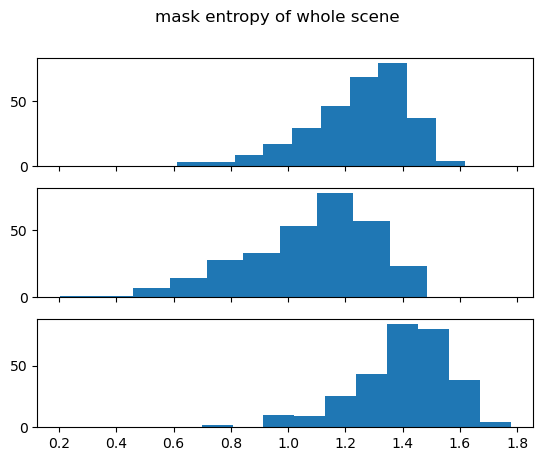

In [96]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('mask entropy of whole scene')
axs[0].hist(dfrc['mew'])
axs[1].hist(dfrc['mewmin'])
axs[2].hist(dfrc['mewmax'])

(array([  2.,   0.,   0.,   7.,   1.,  14.,  35.,  91., 108.,  37.]),
 array([0.        , 0.17650573, 0.35301145, 0.52951718, 0.7060229 ,
        0.88252863, 1.05903435, 1.23554008, 1.4120458 , 1.58855153,
        1.76505725]),
 <BarContainer object of 10 artists>)

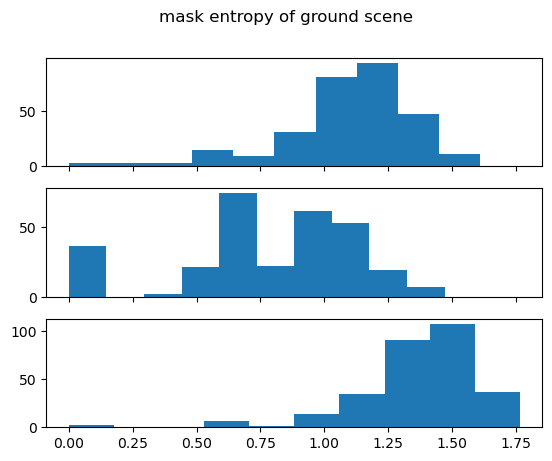

In [60]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('mask entropy of ground scene')
axs[0].hist(dfrc['meg'])
axs[1].hist(dfrc['megmin'])
axs[2].hist(dfrc['megmax'])

(array([ 2.,  0.,  6.,  4., 14., 29., 37., 33., 91., 79.]),
 array([3.90719082, 4.00019696, 4.0932031 , 4.18620924, 4.27921537,
        4.37222151, 4.46522765, 4.55823379, 4.65123993, 4.74424606,
        4.8372522 ]),
 <BarContainer object of 10 artists>)

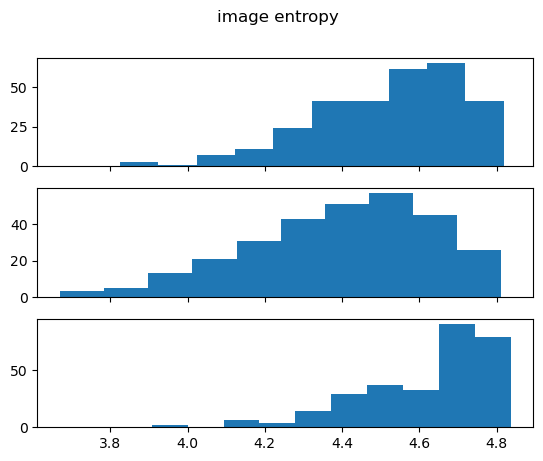

In [61]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('image entropy')
axs[0].hist(dfrc['ie'])
axs[1].hist(dfrc['iemin'])
axs[2].hist(dfrc['iemax'])

(array([145.,  86.,  34.,  16.,   7.,   2.,   1.,   2.,   1.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

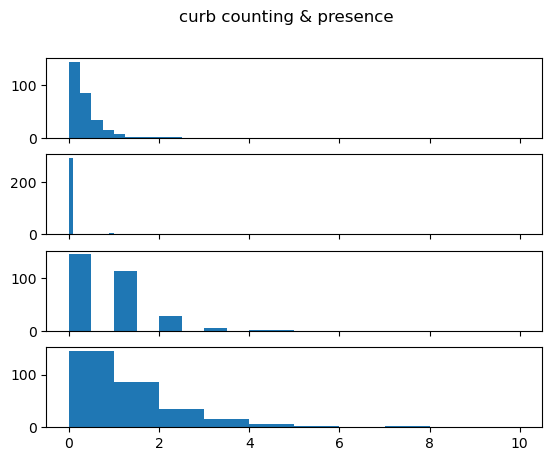

In [62]:
fig, axs = plt.subplots(4, sharex = True)
fig.suptitle('curb counting & presence')
axs[0].hist(dfrc['cmean'])
axs[1].hist(dfrc['cmin'])
axs[2].hist(dfrc['cmax'])
axs[3].hist(dfrc['csum'])

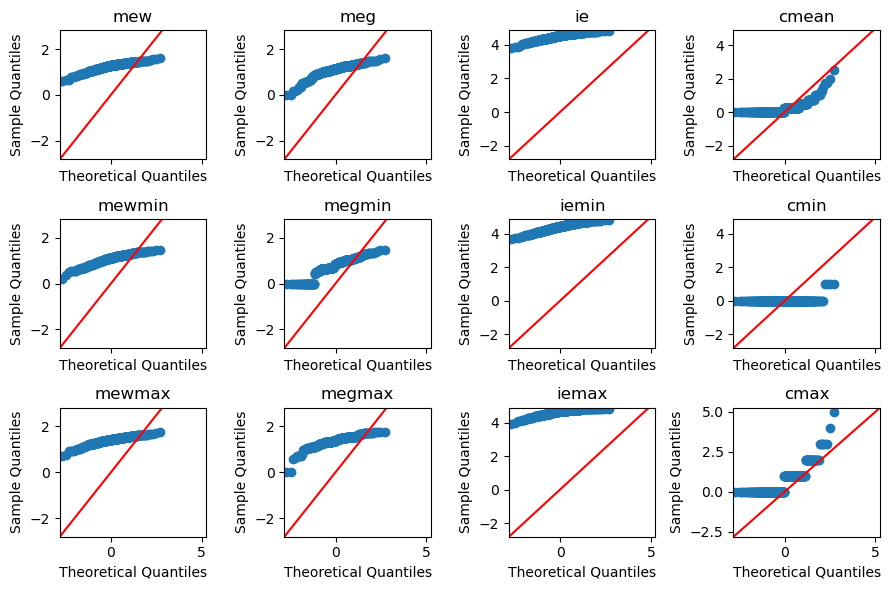

In [104]:
fig, axes = plt.subplots(ncols=4, nrows=3, sharex=True,figsize=(3*3, 2*3))
sm.qqplot(dfrc['mew'], line = '45', ax = axes[0,0])
axes[0,0].set_title('mew')
sm.qqplot(dfrc['mewmin'], line = '45', ax = axes[1,0])
axes[1,0].set_title('mewmin')
sm.qqplot(dfrc['mewmax'], line = '45', ax = axes[2,0])
axes[2,0].set_title('mewmax')
sm.qqplot(dfrc['meg'], line = '45', ax = axes[0,1])
axes[0,1].set_title('meg')
sm.qqplot(dfrc['megmin'], line = '45', ax = axes[1,1])
axes[1,1].set_title('megmin')
sm.qqplot(dfrc['megmax'], line = '45', ax = axes[2,1])
axes[2,1].set_title('megmax')
sm.qqplot(dfrc['ie'], line = '45', ax = axes[0,2])
axes[0,2].set_title('ie')
sm.qqplot(dfrc['iemin'], line = '45', ax = axes[1,2])
axes[1,2].set_title('iemin')
sm.qqplot(dfrc['iemax'], line = '45', ax = axes[2,2])
axes[2,2].set_title('iemax')
sm.qqplot(dfrc['cmean'], line = '45', ax = axes[0,3])
axes[0,3].set_title('cmean')
sm.qqplot(dfrc['cmin'], line = '45', ax = axes[1,3])
axes[1,3].set_title('cmin')
sm.qqplot(dfrc['cmax'], line = '45', ax = axes[2,3])
axes[2,3].set_title('cmax')
plt.tight_layout()

##### Normal distribution test

In [63]:
from scipy import stats

In [64]:
# pip install tabulate

In [65]:
from tabulate import tabulate

In [66]:
res_mew = stats.normaltest(dfrc['mew'])
res_mewmin = stats.normaltest(dfrc['mewmin'])
res_mewmax = stats.normaltest(dfrc['mewmax'])
res_meg = stats.normaltest(dfrc['meg'])
res_megmin = stats.normaltest(dfrc['megmin'])
res_megmax = stats.normaltest(dfrc['megmax'])
res_ie = stats.normaltest(dfrc['ie'])
res_iemin = stats.normaltest(dfrc['iemin'])
res_iemax = stats.normaltest(dfrc['iemax'])
res_cmean = stats.normaltest(dfrc['cmean'])
res_cmin = stats.normaltest(dfrc['cmin'])
res_cmax = stats.normaltest(dfrc['cmax'])

In [67]:
nt = [['','mew', 'meg', 'ie', 'cn'],
      ['var', res_mew.pvalue, res_meg.pvalue, res_ie.pvalue, res_cmean.pvalue],
      ['min', res_mewmin.pvalue, res_megmin.pvalue, res_iemin.pvalue, res_cmin.pvalue],
      ['max', res_mewmax.pvalue, res_megmax.pvalue, res_iemax.pvalue, res_cmax.pvalue]]

In [68]:
print(tabulate(nt))

---  ----------------------  ----------------------  ----------------------  ----------------------
     mew                     meg                     ie                      cn
var  4.40727951207253e-09    9.085136206442949e-20   1.2845308127903771e-07  2.243297732859301e-42
min  2.0773249104189035e-06  1.7123063677699816e-06  0.0015720596740620998   1.336316185102982e-101
max  2.1456165459478802e-11  7.321700186197608e-29   1.049612113000862e-14   2.1158469778304915e-20
---  ----------------------  ----------------------  ----------------------  ----------------------


#### Regression analysis

##### Variables transformation

In [106]:
dfrc.columns

Index(['id', 'G', 'SV', 'LV', 'pd', 'mewmin', 'megmin', 'iemin', 'mewmax',
       'megmax', 'iemax', 'mew', 'meg', 'ie', 'cmean', 'cmin', 'csum', 'cmax',
       'cp'],
      dtype='object')

In [ ]:
# Log transformation

In [125]:
dflog = dfrc
dflog = dflog.drop(['mewmin', 'megmin', 'iemin', 'mewmax',
                    'megmax', 'iemax', 'mew', 'meg', 'ie', 
                    'cmean', 'cmin', 'csum', 'cmax'], axis = 1)

In [126]:
dflog['ie'] = np.log(dfrc['ie'] + 1)
dflog['iemin'] = np.log(dfrc['iemin'] + 1)
dflog['iemax'] = np.log(dfrc['iemax'] + 1)
dflog['mew'] = np.log(dfrc['mew'] + 1)
dflog['mewmin'] = np.log(dfrc['mewmin'] + 1)
dflog['mewmax'] = np.log(dfrc['mewmax'] + 1)
# variables meg, megmin, megmax include zeros
dflog['meg'] = np.log(dfrc['meg'] + 1)
dflog['megmin'] = np.log(dfrc['megmin'] + 1)
dflog['megmax'] = np.log(dfrc['megmax'] + 1)
# variables related number of curbs include zeros
dflog['cmean'] = np.log(dfrc['cmean'] + 1)
dflog['cmin'] = np.log(dfrc['cmin'] + 1)
dflog['cmax'] = np.log(dfrc['cmax'] + 1)

In [127]:
res_mew = stats.normaltest(dflog['mew'])
res_mewmin = stats.normaltest(dflog['mewmin'])
res_mewmax = stats.normaltest(dflog['mewmax'])
res_meg = stats.normaltest(dflog['meg'])
res_megmin = stats.normaltest(dflog['megmin'])
res_megmax = stats.normaltest(dflog['megmax'])
res_ie = stats.normaltest(dflog['ie'])
res_iemin = stats.normaltest(dflog['iemin'])
res_iemax = stats.normaltest(dflog['iemax'])
res_cmean = stats.normaltest(dflog['cmean'])
res_cmin = stats.normaltest(dflog['cmin'])
res_cmax = stats.normaltest(dflog['cmax'])
nt = [['','mew', 'meg', 'ie', 'cn'],
      ['var', res_mew.pvalue, res_meg.pvalue, res_ie.pvalue, res_cmean.pvalue],
      ['min', res_mewmin.pvalue, res_megmin.pvalue, res_iemin.pvalue, res_cmin.pvalue],
      ['max', res_mewmax.pvalue, res_megmax.pvalue, res_iemax.pvalue, res_cmax.pvalue]]

In [128]:
print(tabulate(nt))

---  ----------------------  ----------------------  ----------------------  -----------------------
     mew                     meg                     ie                      cn
var  4.678322770349487e-14   2.0226256244301858e-33  2.120603426513088e-09   2.686057042056305e-20
min  3.215771680187363e-13   1.0870897986001945e-13  0.0002338477716250513   1.3363161851029055e-101
max  1.9722214226021845e-17  6.690804996999687e-52   1.0579960896988985e-16  6.704950173915953e-11
---  ----------------------  ----------------------  ----------------------  -----------------------


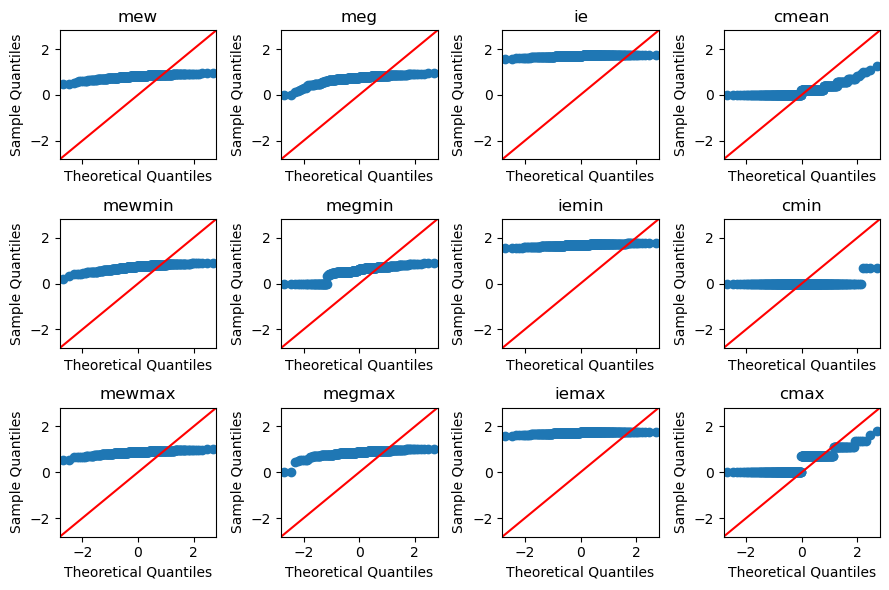

In [129]:
fig, axes = plt.subplots(ncols=4, nrows=3, sharex=True,figsize=(3*3, 2*3))
sm.qqplot(dflog['mew'], line = '45', ax = axes[0,0])
axes[0,0].set_title('mew')
sm.qqplot(dflog['mewmin'], line = '45', ax = axes[1,0])
axes[1,0].set_title('mewmin')
sm.qqplot(dflog['mewmax'], line = '45', ax = axes[2,0])
axes[2,0].set_title('mewmax')
sm.qqplot(dflog['meg'], line = '45', ax = axes[0,1])
axes[0,1].set_title('meg')
sm.qqplot(dflog['megmin'], line = '45', ax = axes[1,1])
axes[1,1].set_title('megmin')
sm.qqplot(dflog['megmax'], line = '45', ax = axes[2,1])
axes[2,1].set_title('megmax')
sm.qqplot(dflog['ie'], line = '45', ax = axes[0,2])
axes[0,2].set_title('ie')
sm.qqplot(dflog['iemin'], line = '45', ax = axes[1,2])
axes[1,2].set_title('iemin')
sm.qqplot(dflog['iemax'], line = '45', ax = axes[2,2])
axes[2,2].set_title('iemax')
sm.qqplot(dflog['cmean'], line = '45', ax = axes[0,3])
axes[0,3].set_title('cmean')
sm.qqplot(dflog['cmin'], line = '45', ax = axes[1,3])
axes[1,3].set_title('cmin')
sm.qqplot(dflog['cmax'], line = '45', ax = axes[2,3])
axes[2,3].set_title('cmax')
plt.tight_layout()

Log transformation doesn't work well for this datasets.

In [ ]:
# Cube root

In [131]:
dfcube = dfrc
dfcube = dfcube.drop(['mewmin', 'megmin', 'iemin', 'mewmax',
                    'megmax', 'iemax', 'mew', 'meg', 'ie', 
                    'cmean', 'cmin', 'csum', 'cmax'], axis = 1)
dfcube['ie'] = np.cbrt(dfrc['ie'])
dfcube['iemin'] = np.cbrt(dfrc['iemin'])
dfcube['iemax'] = np.cbrt(dfrc['iemax'])
dfcube['mew'] = np.cbrt(dfrc['mew'])
dfcube['mewmin'] = np.cbrt(dfrc['mewmin'])
dfcube['mewmax'] = np.cbrt(dfrc['mewmax'])
# variables meg, megmin, megmax include zeros
dfcube['meg'] = np.cbrt(dfrc['meg'])
dfcube['megmin'] = np.cbrt(dfrc['megmin'])
dfcube['megmax'] = np.cbrt(dfrc['megmax'])
# variables related number of curbs include zeros
dfcube['cmean'] = np.cbrt(dfrc['cmean'])
dfcube['cmin'] = np.cbrt(dfrc['cmin'])
dfcube['cmax'] = np.cbrt(dfrc['cmax'])

In [132]:
res_mew = stats.normaltest(dfcube['mew'])
res_mewmin = stats.normaltest(dfcube['mewmin'])
res_mewmax = stats.normaltest(dfcube['mewmax'])
res_meg = stats.normaltest(dfcube['meg'])
res_megmin = stats.normaltest(dfcube['megmin'])
res_megmax = stats.normaltest(dfcube['megmax'])
res_ie = stats.normaltest(dfcube['ie'])
res_iemin = stats.normaltest(dfcube['iemin'])
res_iemax = stats.normaltest(dfcube['iemax'])
res_cmean = stats.normaltest(dfcube['cmean'])
res_cmin = stats.normaltest(dfcube['cmin'])
res_cmax = stats.normaltest(dfcube['cmax'])
nt = [['','mew', 'meg', 'ie', 'cn'],
      ['var', res_mew.pvalue, res_meg.pvalue, res_ie.pvalue, res_cmean.pvalue],
      ['min', res_mewmin.pvalue, res_megmin.pvalue, res_iemin.pvalue, res_cmin.pvalue],
      ['max', res_mewmax.pvalue, res_megmax.pvalue, res_iemax.pvalue, res_cmax.pvalue]]
print(tabulate(nt))

---  ----------------------  ----------------------  ---------------------  ----------------------
     mew                     meg                     ie                     cn
var  7.062129168845458e-16   2.1366870017210103e-68  4.638904943577121e-09  0.0
min  1.3062612550063895e-19  1.9882923750174546e-26  0.0003511423696731148  1.336316185102982e-101
max  4.547417849206813e-19   2.1310947978749235e-92  2.514746342404116e-16  0.0
---  ----------------------  ----------------------  ---------------------  ----------------------


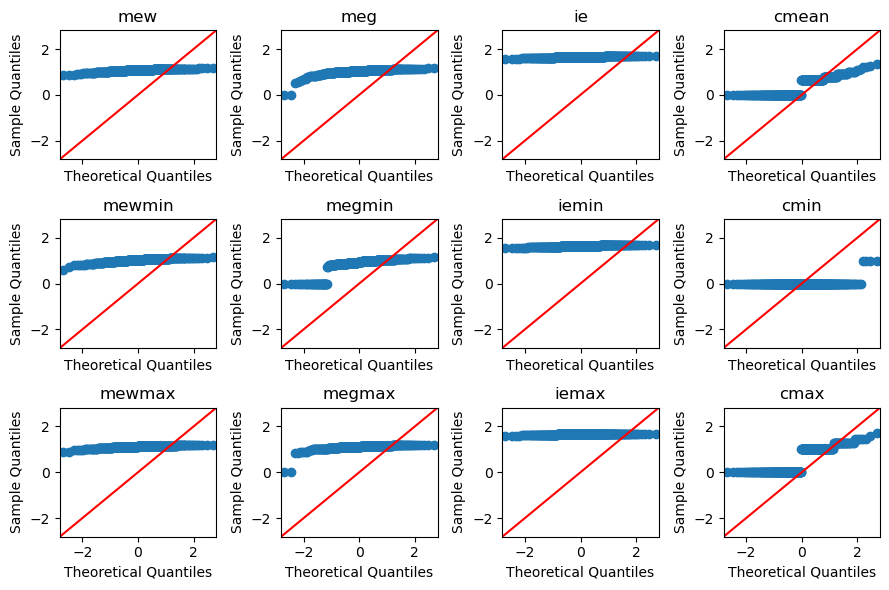

In [133]:
fig, axes = plt.subplots(ncols=4, nrows=3, sharex=True,figsize=(3*3, 2*3))
sm.qqplot(dfcube['mew'], line = '45', ax = axes[0,0])
axes[0,0].set_title('mew')
sm.qqplot(dfcube['mewmin'], line = '45', ax = axes[1,0])
axes[1,0].set_title('mewmin')
sm.qqplot(dfcube['mewmax'], line = '45', ax = axes[2,0])
axes[2,0].set_title('mewmax')
sm.qqplot(dfcube['meg'], line = '45', ax = axes[0,1])
axes[0,1].set_title('meg')
sm.qqplot(dfcube['megmin'], line = '45', ax = axes[1,1])
axes[1,1].set_title('megmin')
sm.qqplot(dfcube['megmax'], line = '45', ax = axes[2,1])
axes[2,1].set_title('megmax')
sm.qqplot(dfcube['ie'], line = '45', ax = axes[0,2])
axes[0,2].set_title('ie')
sm.qqplot(dfcube['iemin'], line = '45', ax = axes[1,2])
axes[1,2].set_title('iemin')
sm.qqplot(dfcube['iemax'], line = '45', ax = axes[2,2])
axes[2,2].set_title('iemax')
sm.qqplot(dfcube['cmean'], line = '45', ax = axes[0,3])
axes[0,3].set_title('cmean')
sm.qqplot(dfcube['cmin'], line = '45', ax = axes[1,3])
axes[1,3].set_title('cmin')
sm.qqplot(dfcube['cmax'], line = '45', ax = axes[2,3])
axes[2,3].set_title('cmax')
plt.tight_layout()

In [152]:
# Yeojohnson
dfyj = dfrc
dfyj = dfyj.drop(['mewmin', 'megmin', 'iemin', 'mewmax',
                    'megmax', 'iemax', 'mew', 'meg', 'ie', 
                    'cmean', 'cmin', 'csum', 'cmax'], axis = 1)
dfyj['ie'], l0 = stats.yeojohnson(dfrc['ie'])
dfyj['iemin'], l1 = stats.yeojohnson(dfrc['iemin'])
dfyj['iemax'], l2 = stats.yeojohnson(dfrc['iemax'])
dfyj['mew'], l3 = stats.yeojohnson(dfrc['mew'])
dfyj['mewmin'], l4 = stats.yeojohnson(dfrc['mewmin'])
dfyj['mewmax'], l5 = stats.yeojohnson(dfrc['mewmax'])
dfyj['meg'], l6 = stats.yeojohnson(dfrc['meg'])
dfyj['megmin'], l7 = stats.yeojohnson(dfrc['megmin'])
dfyj['megmax'], l8 = stats.yeojohnson(dfrc['megmax'])
dfyj['cmean'], l9 = stats.yeojohnson(dfrc['cmean'])
dfyj['cmin'], l10 = stats.yeojohnson(dfrc['cmin'])
dfyj['cmax'], l11 = stats.yeojohnson(dfrc['cmax'])

In [153]:
res_mew = stats.normaltest(dfyj['mew'])
res_mewmin = stats.normaltest(dfyj['mewmin'])
res_mewmax = stats.normaltest(dfyj['mewmax'])
res_meg = stats.normaltest(dfyj['meg'])
res_megmin = stats.normaltest(dfyj['megmin'])
res_megmax = stats.normaltest(dfyj['megmax'])
res_ie = stats.normaltest(dfyj['ie'])
res_iemin = stats.normaltest(dfyj['iemin'])
res_iemax = stats.normaltest(dfyj['iemax'])
res_cmean = stats.normaltest(dfyj['cmean'])
res_cmin = stats.normaltest(dfyj['cmin'])
res_cmax = stats.normaltest(dfyj['cmax'])
nt = [['','mew', 'meg', 'ie', 'cn'],
      ['var', res_mew.pvalue, res_meg.pvalue, res_ie.pvalue, res_cmean.pvalue],
      ['min', res_mewmin.pvalue, res_megmin.pvalue, res_iemin.pvalue, res_cmin.pvalue],
      ['max', res_mewmax.pvalue, res_megmax.pvalue, res_iemax.pvalue, res_cmax.pvalue]]
print(tabulate(nt))

---  ---------------------  -------------------  ----------------------  -----------------------
     mew                    meg                  ie                      cn
var  0.31525960932841124    0.8497153577187269   5.3858230539457436e-05  0.0
min  0.0038062240301019565  0.23460700875089663  0.0003412831527147932   1.3363161851030585e-101
max  0.9792734126035906     0.8863388873359472   8.499471186911817e-15   0.0
---  ---------------------  -------------------  ----------------------  -----------------------


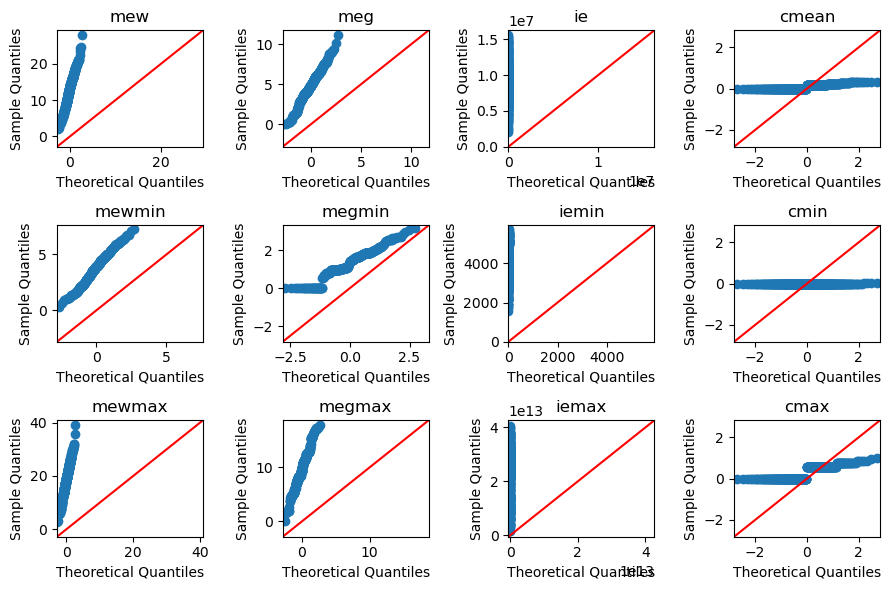

In [154]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(3*3, 2*3))
sm.qqplot(dfyj['mew'], line = '45', ax = axes[0,0])
axes[0,0].set_title('mew')
sm.qqplot(dfyj['mewmin'], line = '45', ax = axes[1,0])
axes[1,0].set_title('mewmin')
sm.qqplot(dfyj['mewmax'], line = '45', ax = axes[2,0])
axes[2,0].set_title('mewmax')
sm.qqplot(dfyj['meg'], line = '45', ax = axes[0,1])
axes[0,1].set_title('meg')
sm.qqplot(dfyj['megmin'], line = '45', ax = axes[1,1])
axes[1,1].set_title('megmin')
sm.qqplot(dfyj['megmax'], line = '45', ax = axes[2,1])
axes[2,1].set_title('megmax')
sm.qqplot(dfyj['ie'], line = '45', ax = axes[0,2])
axes[0,2].set_title('ie')
sm.qqplot(dfyj['iemin'], line = '45', ax = axes[1,2])
axes[1,2].set_title('iemin')
sm.qqplot(dfyj['iemax'], line = '45', ax = axes[2,2])
axes[2,2].set_title('iemax')
sm.qqplot(dfyj['cmean'], line = '45', ax = axes[0,3])
axes[0,3].set_title('cmean')
sm.qqplot(dfyj['cmin'], line = '45', ax = axes[1,3])
axes[1,3].set_title('cmin')
sm.qqplot(dfyj['cmax'], line = '45', ax = axes[2,3])
axes[2,3].set_title('cmax')
plt.tight_layout()

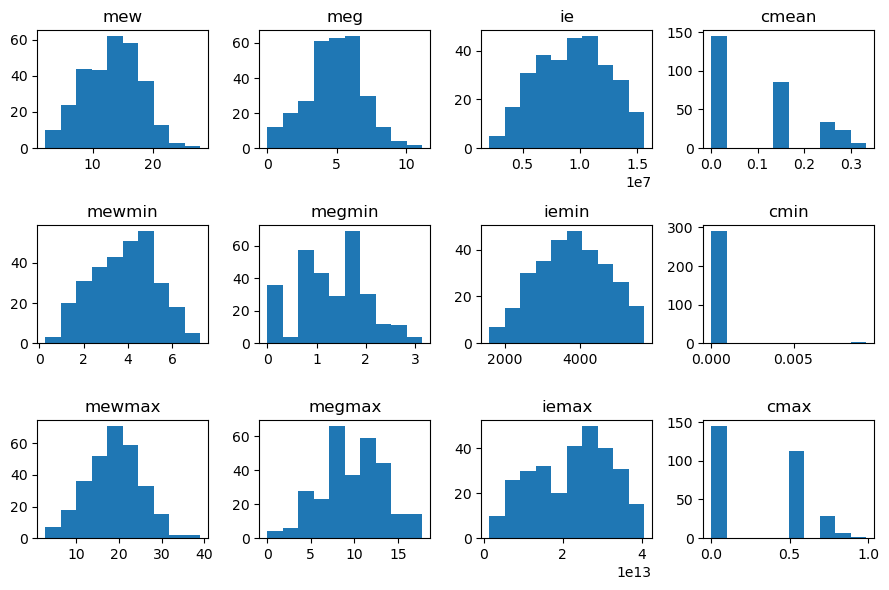

In [155]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(3*3, 2*3))
axes[0,0].hist(dfyj['mew'])
axes[0,0].set_title('mew')
axes[1,0].hist(dfyj['mewmin'])
axes[1,0].set_title('mewmin')
axes[2,0].hist(dfyj['mewmax'])
axes[2,0].set_title('mewmax')
axes[0,1].hist(dfyj['meg'])
axes[0,1].set_title('meg')
axes[1,1].hist(dfyj['megmin'])
axes[1,1].set_title('megmin')
axes[2,1].hist(dfyj['megmax'])
axes[2,1].set_title('megmax')
axes[0,2].hist(dfyj['ie'])
axes[0,2].set_title('ie')
axes[1,2].hist(dfyj['iemin'])
axes[1,2].set_title('iemin')
axes[2,2].hist(dfyj['iemax'])
axes[2,2].set_title('iemax')
axes[0,3].hist(dfyj['cmean'])
axes[0,3].set_title('cmean')
axes[1,3].hist(dfyj['cmin'])
axes[1,3].set_title('cmin')
axes[2,3].hist(dfyj['cmax'])
axes[2,3].set_title('cmax')
plt.tight_layout()

In [ ]:
# Standardization

In [158]:
dfst = dfyj
dfst.columns

Index(['id', 'G', 'SV', 'LV', 'pd', 'cp', 'ie', 'iemin', 'iemax', 'mew',
       'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax'],
      dtype='object')

In [159]:
dfst['ie'] = stats.zscore(dfyj['ie'])
dfst['iemin'] = stats.zscore(dfyj['iemin'])
dfst['iemax'] = stats.zscore(dfyj['iemax'])
dfst['mew'] = stats.zscore(dfyj['mew'])
dfst['mewmin'] = stats.zscore(dfyj['mewmin'])
dfst['mewmax'] = stats.zscore(dfyj['mewmax'])
dfst['meg'] = stats.zscore(dfyj['meg'])
dfst['megmin'] = stats.zscore(dfyj['megmin'])
dfst['megmax'] = stats.zscore(dfyj['megmax'])
dfst['cmean'] = stats.zscore(dfyj['cmean'])
dfst['cmin'] = stats.zscore(dfyj['cmin'])
dfst['cmax'] = stats.zscore(dfyj['cmax'])

In [161]:
# Regression model preparation of accident points data, after normalization and standardization
# dfst.to_csv('/home/yelhe/script/mt/output/accident_rm_norm_stan.csv', index = False)

In [165]:
# # vc
# vc = dfst[['mew', 'mewmin', 'mewmax', 'meg','megmin','megmax', 'ie','iemin', 'iemax','cmean','cmin','cmax', 'SV', 'LV', 'pd']]
# corr_matrix = vc.corr()
# sn.heatmap(corr_matrix, annot = True)
# plt.show()

In [171]:
dfst

,id,G,SV,LV,pd,cp,ie,iemin,iemax,mew,mewmin,mewmax,meg,megmin,megmax,cmean,cmin,cmax
0,99900060852597,0,0,1,15,1,-0.657370,-0.217311,-0.913935,2.465985,1.418306,3.290652,-0.002869,0.645363,-0.605806,1.556261,-0.117242,1.435870
1,99900063018611,0,1,0,0,1,-0.791117,-0.772531,-0.935720,-0.314871,-0.046518,0.005271,1.459028,1.239507,0.845621,1.211102,-0.117242,1.435870
2,99900052723510,0,0,1,500,1,1.408380,1.435020,1.205968,2.371130,2.407072,1.751330,0.148913,0.747999,0.460590,1.556261,-0.117242,0.763074
3,99900061514043,0,0,1,3000,1,-0.237414,-1.149421,0.417812,0.840529,1.299824,0.226998,-0.283728,-0.071821,-0.109423,1.556261,-0.117242,1.435870
4,99900063037843,0,1,0,200,1,1.189897,1.324371,1.018182,1.043759,0.385839,1.337648,0.393958,-0.434300,0.625265,0.540317,-0.117242,0.763074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,99900056387598,0,0,1,500,1,-0.861849,-1.053402,-0.863892,0.629446,0.814204,-0.006877,0.485869,0.747999,-0.415672,1.556261,-0.117242,1.803335
291,99900055999694,0,0,2,800,1,1.201288,1.182467,1.268036,-0.282579,-0.204796,-0.384932,-0.362761,-0.377477,-0.376197,0.540317,-0.117242,0.763074
292,99900055905276,0,0,1,0,1,0.748736,0.407661,1.163419,0.884159,1.067013,0.189950,0.507942,-0.377477,0.845621,0.540317,-0.117242,0.763074
293,99900060670975,0,0,1,200,0,0.936255,0.933286,0.961381,0.090480,0.353478,-0.328232,0.204021,-0.730372,0.080728,-0.955972,-0.117242,-0.985722


In [166]:
Y = dfrc['SV']
X = dfrc[['mew', 'mewmin', 'mewmax', 
          'meg','megmin','megmax', 
          'ie','iemin', 'iemax',
          'cmean','cmin','cmax']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SV   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.506
Date:                Sun, 10 Mar 2024   Prob (F-statistic):              0.121
Time:                        18:54:42   Log-Likelihood:                -117.84
No. Observations:                 295   AIC:                             261.7
Df Residuals:                     282   BIC:                             309.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6965      0.618      2.744      0.006       0.480       2.913
mew           -0.2720      0.653     -0.416      0.678      -1.558       1.014
mewmin         0.1926      0.310      0.622      0.534      -0.417       0.802
mewmax        -0.1335      0.398     -0.336      0.737      -0.917       0.650
meg            0.2886      0.320      0.902      0.368      -0.341       0.918
megmin        -0.1662      0.152     -1.096      0.274      -0.465       0.132
megmax         0.0507      0.209      0.243      0.808      -0.361       0.462
ie             1.4424      1.057      1.365      0.173      -0.638       3.523
iemin         -0.2569      0.482     -0.533      0.595      -1.206       0.692
iemax         -1.4829      0.653     -2.271      0.024      -2.768      -0.197
cmean         -0.0830      0.194     -0.427      0.670      -0.465       0.299
cmin           0.0629      0.253      0.249      0.804      -0.435       0.561
cmax           0.0236      0.075      0.316      0.752      -0.124       0.171
==============================================================================
Omnibus:                       81.556   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.682
Skew:                           1.633   Prob(JB):                     3.82e-32
Kurtosis:                       4.048   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
Y = dfrc['LV']
X = dfrc[['mew', 'mewmin', 'mewmax', 
          'meg','megmin','megmax', 
          'ie','iemin', 'iemax',
          'cmean','cmin','cmax']]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.208
Date:                Sun, 10 Mar 2024   Prob (F-statistic):              0.277
Time:                        18:56:17   Log-Likelihood:                -228.06
No. Observations:                 295   AIC:                             482.1
Df Residuals:                     282   BIC:                             530.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7832      0.898     -0.872      0.384      -2.551       0.985
mew           -1.6839      0.949     -1.774      0.077      -3.553       0.185
mewmin         0.4353      0.450      0.968      0.334      -0.450       1.321
mewmax         1.0011      0.578      1.732      0.084      -0.137       2.139
meg           -0.2130      0.465     -0.458      0.647      -1.128       0.702
megmin         0.1150      0.220      0.522      0.602      -0.319       0.549
megmax         0.0603      0.304      0.199      0.843      -0.537       0.658
ie            -2.4323      1.536     -1.584      0.114      -5.455       0.590
iemin          1.1475      0.701      1.638      0.103      -0.231       2.526
iemax          1.6844      0.949      1.775      0.077      -0.183       3.552
cmean          0.2550      0.282      0.903      0.367      -0.301       0.811
cmin           0.0327      0.367      0.089      0.929      -0.690       0.756
cmax          -0.0839      0.109     -0.773      0.440      -0.298       0.130
==============================================================================
Omnibus:                        2.187   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.193
Skew:                          -0.162   Prob(JB):                        0.334
Kurtosis:                       2.729   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
Y = dfrc['pd']
X = dfrc[['mew', 'mewmin', 'mewmax', 
          'meg','megmin','megmax', 
          'ie','iemin', 'iemax',
          'cmean','cmin','cmax']]
X = sm.add_constant(X)
model3 = sm.OLS(Y, X)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.688
Date:                Sun, 10 Mar 2024   Prob (F-statistic):            0.00192
Time:                        18:56:35   Log-Likelihood:                -2803.8
No. Observations:                 295   AIC:                             5634.
Df Residuals:                     282   BIC:                             5681.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3023.1876   5562.881     -0.543      0.587    -1.4e+04    7926.854
mew        -2019.1652   5879.830     -0.343      0.732   -1.36e+04    9554.762
mewmin       777.9489   2786.061      0.279      0.780   -4706.167    6262.065
mewmax      1107.9618   3580.395      0.309      0.757   -5939.731    8155.655
meg        -8705.0567   2879.285     -3.023      0.003   -1.44e+04   -3037.438
megmin      4000.9870   1364.644      2.932      0.004    1314.806    6687.168
megmax      5612.6067   1879.927      2.986      0.003    1912.136    9313.078
ie         -2.994e+04   9510.560     -3.148      0.002   -4.87e+04   -1.12e+04
iemin       8724.6096   4338.633      2.011      0.045     184.393    1.73e+04
iemax       2.162e+04   5876.807      3.679      0.000    1.01e+04    3.32e+04
cmean       -222.0246   1748.436     -0.127      0.899   -3663.666    3219.617
cmin       -2249.8514   2275.023     -0.989      0.324   -6728.034    2228.331
cmax         -47.8091    672.721     -0.071      0.943   -1372.000    1276.382
==============================================================================
Omnibus:                      503.170   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187228.628
Skew:                           9.245   Prob(JB):                         0.00
Kurtosis:                     125.026   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Regression

In [78]:
# result_sp = sm.OLS(formula='sp ~ mew + meg + ie + cn', data=dfrc).fit()
Y = dfrc['sp']
X = dfrc[['mew','meg','ie','cn']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
result1 = model1.fit()
result1.summary()

const    3.006348
mew     -1.378461
meg      0.464645
ie      -0.039340
cn      -0.017868
dtype: float64

In [79]:
result1.tvalues

const    1.278016
mew     -2.155572
meg      1.093304
ie      -0.078663
cn      -0.242419
dtype: float64

In [84]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sp   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.297
Date:                Thu, 07 Mar 2024   Prob (F-statistic):              0.271
Time:                        13:28:21   Log-Likelihood:                -560.59
No. Observations:                 295   AIC:                             1131.
Df Residuals:                     290   BIC:                             1150.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0063      2.352      1.278      0.202      -1.624       7.636
mew           -1.3785      0.639     -2.156      0.032      -2.637      -0.120
meg            0.4646      0.425      1.093      0.275      -0.372       1.301
ie            -0.0393      0.500     -0.079      0.937      -1.024       0.945
cn            -0.0179      0.074     -0.242      0.809      -0.163       0.127
==============================================================================
Omnibus:                       73.775   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.847
Skew:                           1.520   Prob(JB):                     1.28e-27
Kurtosis:                       3.914   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# result_sp = sm.OLS(formula='sp ~ mew + meg + ie + cn', data=dfrc).fit()
Y2 = dfrc['pd']
X2 = dfrc[['mew','meg','ie','cn']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2)
result2 = model2.fit()
result2.params

const    8775.819709
mew       292.416884
meg       579.330298
ie      -1905.199714
cn       -124.232695
dtype: float64

In [86]:
result2.tvalues

const    1.775085
mew      0.217573
meg      0.648606
ie      -1.812638
cn      -0.801993
dtype: float64

In [87]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.120
Date:                Thu, 07 Mar 2024   Prob (F-statistic):              0.347
Time:                        13:31:50   Log-Likelihood:                -2817.5
No. Observations:                 295   AIC:                             5645.
Df Residuals:                     290   BIC:                             5663.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8775.8197   4943.887      1.775      0.077    -954.630    1.85e+04
mew          292.4169   1343.995      0.218      0.828   -2352.805    2937.638
meg          579.3303    893.193      0.649      0.517   -1178.633    2337.293
ie         -1905.1997   1051.064     -1.813      0.071   -3973.882     163.482
cn          -124.2327    154.905     -0.802      0.423    -429.113     180.648
==============================================================================
Omnibus:                      556.733   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320937.334
Skew:                          11.247   Prob(JB):                         0.00
Kurtosis:                     163.013   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

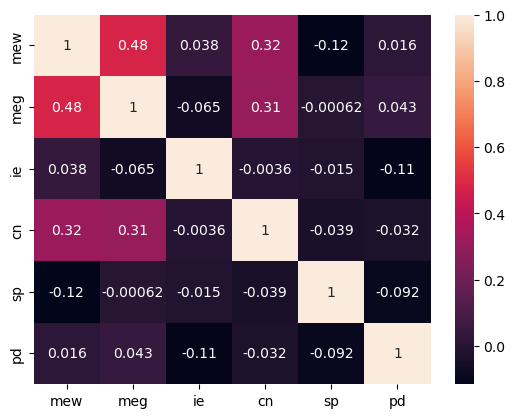

In [88]:
# vc
vc = dfrc[['mew', 'meg', 'ie', 'cn', 'sp', 'pd']]
corr_matrix = vc.corr()
sn.heatmap(corr_matrix, annot = True)
plt.show()

In [90]:
Y3 = dfrc['sp']
X3 = dfrc['mew']
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sp   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.981
Date:                Thu, 07 Mar 2024   Prob (F-statistic):             0.0469
Time:                        13:44:11   Log-Likelihood:                -561.22
No. Observations:                 295   AIC:                             1126.
Df Residuals:                     293   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9600      0.685      4.322      0.000       1.612       4.308
mew           -1.0892      0.546     -1.995      0.047      -2.164      -0.015
==============================================================================
Omnibus:                       73.700   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.717
Skew:                           1.522   Prob(JB):                     1.37e-27
Kurtosis:                       3.891   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""